In [22]:
import pandas as pd

# pandas 缺失值 NaN 简介

缺失数据有多重表现形式：

1）数据库中，缺失数据表示为NULL

2）在某些编程语言中用NA或None表示

3）缺失值也可能是空字符串''或数值 0

4）在 pandas 中使用 NaN 表示缺失值

缺失值有以下几种表现形式：NAN,NaN,nan，他们都一样

In [23]:
import numpy as np
print(np.NAN)
print(np.NaN)
print(np.nan)

nan
nan
nan


缺失值和其它类型的数据不同，它毫无意义，NaN不等于0，也不等于空字符串

In [24]:
print(np.NaN==True)
print(np.NaN==False)
print(np.NaN==0)
print(np.NaN=='')
print(np.NaN==None)

False
False
False
False
False


两个NaN也不相等

In [25]:
print(np.NAN==np.NaN)
print(np.NAN==np.NAN)
print(np.NaN==np.NaN)
print(np.NaN==np.NAN)

False
False
False
False


pandas 判断是否为缺失值方法

In [26]:
print(pd.isnull(np.NAN))
print(pd.isnull(np.NaN))
print(pd.isnull(np.nan))

True
True
True


In [27]:
print(pd.notnull(np.NaN))
print(pd.notnull(42))

False
True


In [28]:
print(pd.isna(np.nan))

True


# 加载包含缺失值的数据

缺失值从何而来呢？缺失值的来源有两个：

- 1）原始数据包含缺失值

- 2）数据整理过程中产生缺失值

In [29]:
# 使用 pandas 加载 survey_visited.csv 数据
pd.read_csv('./data/survey_visited.csv')

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [30]:
pd.read_csv('./data/survey_visited.csv',keep_default_na=False)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [31]:
pd.read_csv('./data/survey_visited.csv',na_values=["DR-3"],keep_default_na=False)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,NaN,1939-01-07
3,735,NaN,1930-01-12
4,751,NaN,1930-02-26
5,752,NaN,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


在做数据合并的时候，比如merge、join等操作时，也可能会产生缺失值，参数用法一致，这里不再赘述

# 缺失值的处理

## 缺失值处理方式概述
- 删除
- 填充

## 加载数据并查看缺失情况

In [32]:
# 加载数据
train = pd.read_csv('./data/titanic_train.csv')
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
# 计算所有缺失值
mis_val = train.isnull().sum()
mis_val

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
# 计算缺失值的比例
mis_val_percent = 100*mis_val/len(train)
mis_val_percent

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [36]:
# 将结果拼接成DataFrame
mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
mis_val_table

,0,1
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [37]:
# 将列重命名
mis_val_table_ren_colmns = mis_val_table.rename(columns={0:'缺失值',1:'占比(%)'})
mis_val_table_ren_colmns

,缺失值,占比(%)
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [38]:
# 将缺失值为0的列去除，并按缺失值占比进行排序
mis_val_table_ren_colmns = mis_val_table_ren_colmns[mis_val_table_ren_colmns.iloc[:,1]!=0].sort_values('占比(%)',ascending=False)
mis_val_table_ren_colmns

,缺失值,占比(%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [39]:
# 打印信息
print(f'传入的数据集共{train.shape[1]}列，\n其中{mis_val_table_ren_colmns.shape[0]}列有缺失值')

传入的数据集共12列，
其中3列有缺失值


In [40]:
def missing_value_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100*mis_val/len(df)
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_table_ren_colmns = mis_val_table.rename(columns={0:'缺失值',1:'占比(%)'})
    mis_val_table_ren_colmns = mis_val_table_ren_colmns[mis_val_table_ren_colmns.iloc[:,1]!=0].sort_values('占比(%)',ascending=False)
    print(f'传入的数据集共{train.shape[1]}列，\n其中{mis_val_table_ren_colmns.shape[0]}列有缺失值')
    return mis_val_table_ren_colmns

In [41]:
missing_value_table(train)

传入的数据集共12列，
其中3列有缺失值


,缺失值,占比(%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


# 使用Missingno库对缺失值的情况进行可视化探查

## 安装 missingno 并初步查看
- 完全关闭jupyter notebook
- 重新打开anaconda提供的终端中，通过pip安装missingno
- 安装成功后重新打开jupyter notebook，并运行全部代码

## 缺失值数量可视化

<AxesSubplot: >

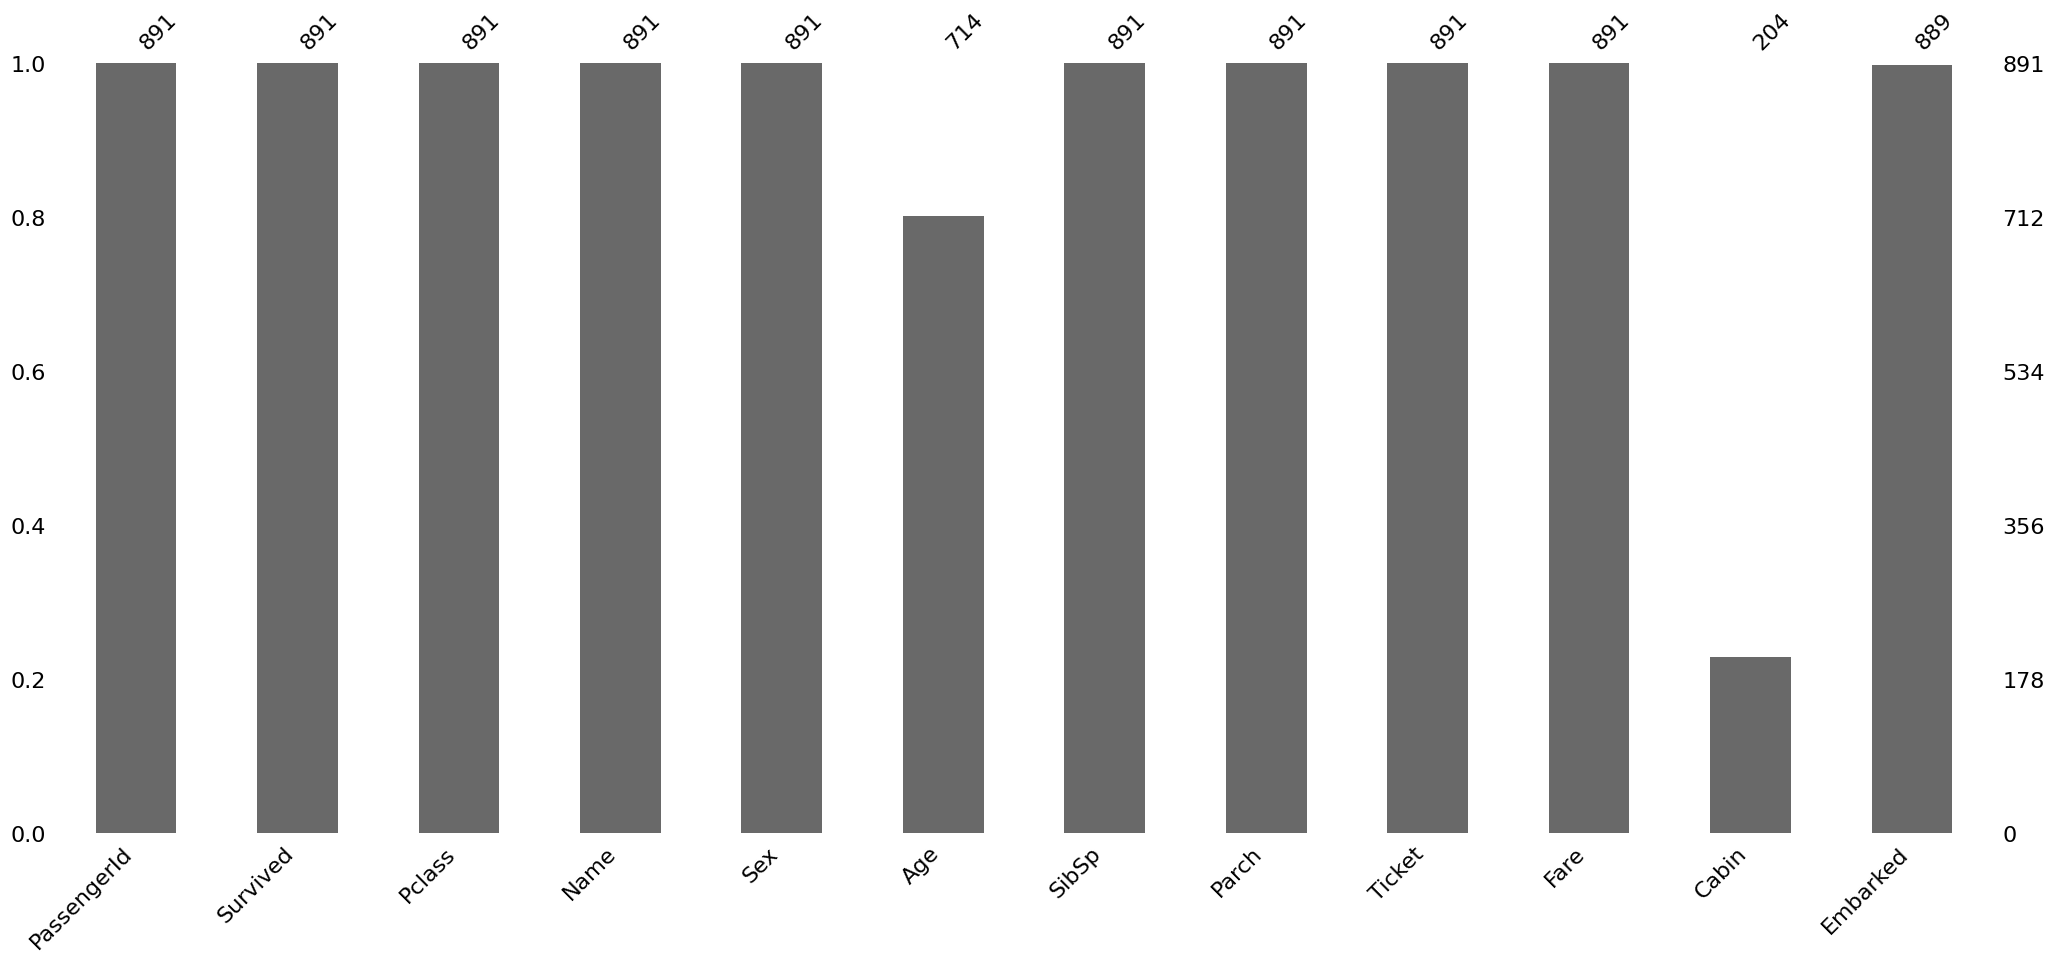

In [42]:
import missingno as msno
msno.bar(train)

## 缺失值位置的可视化

<AxesSubplot: >

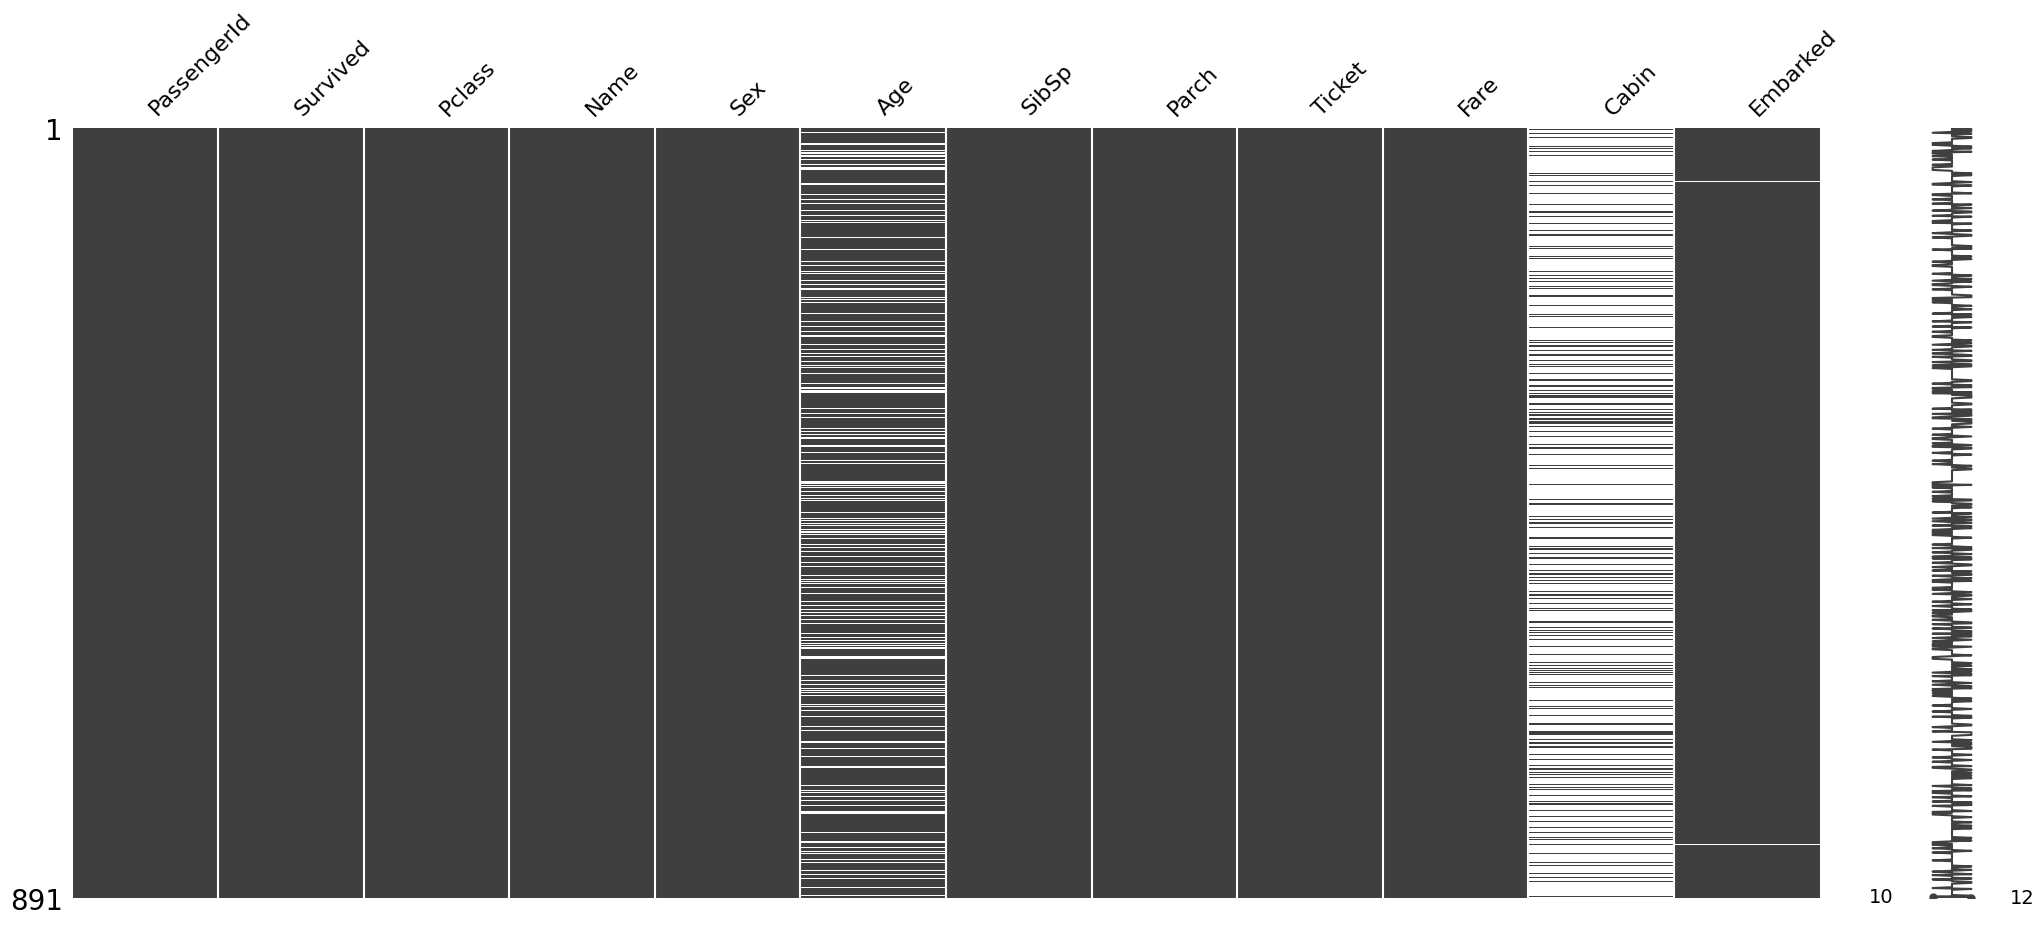

In [43]:
msno.matrix(train)

<AxesSubplot: >

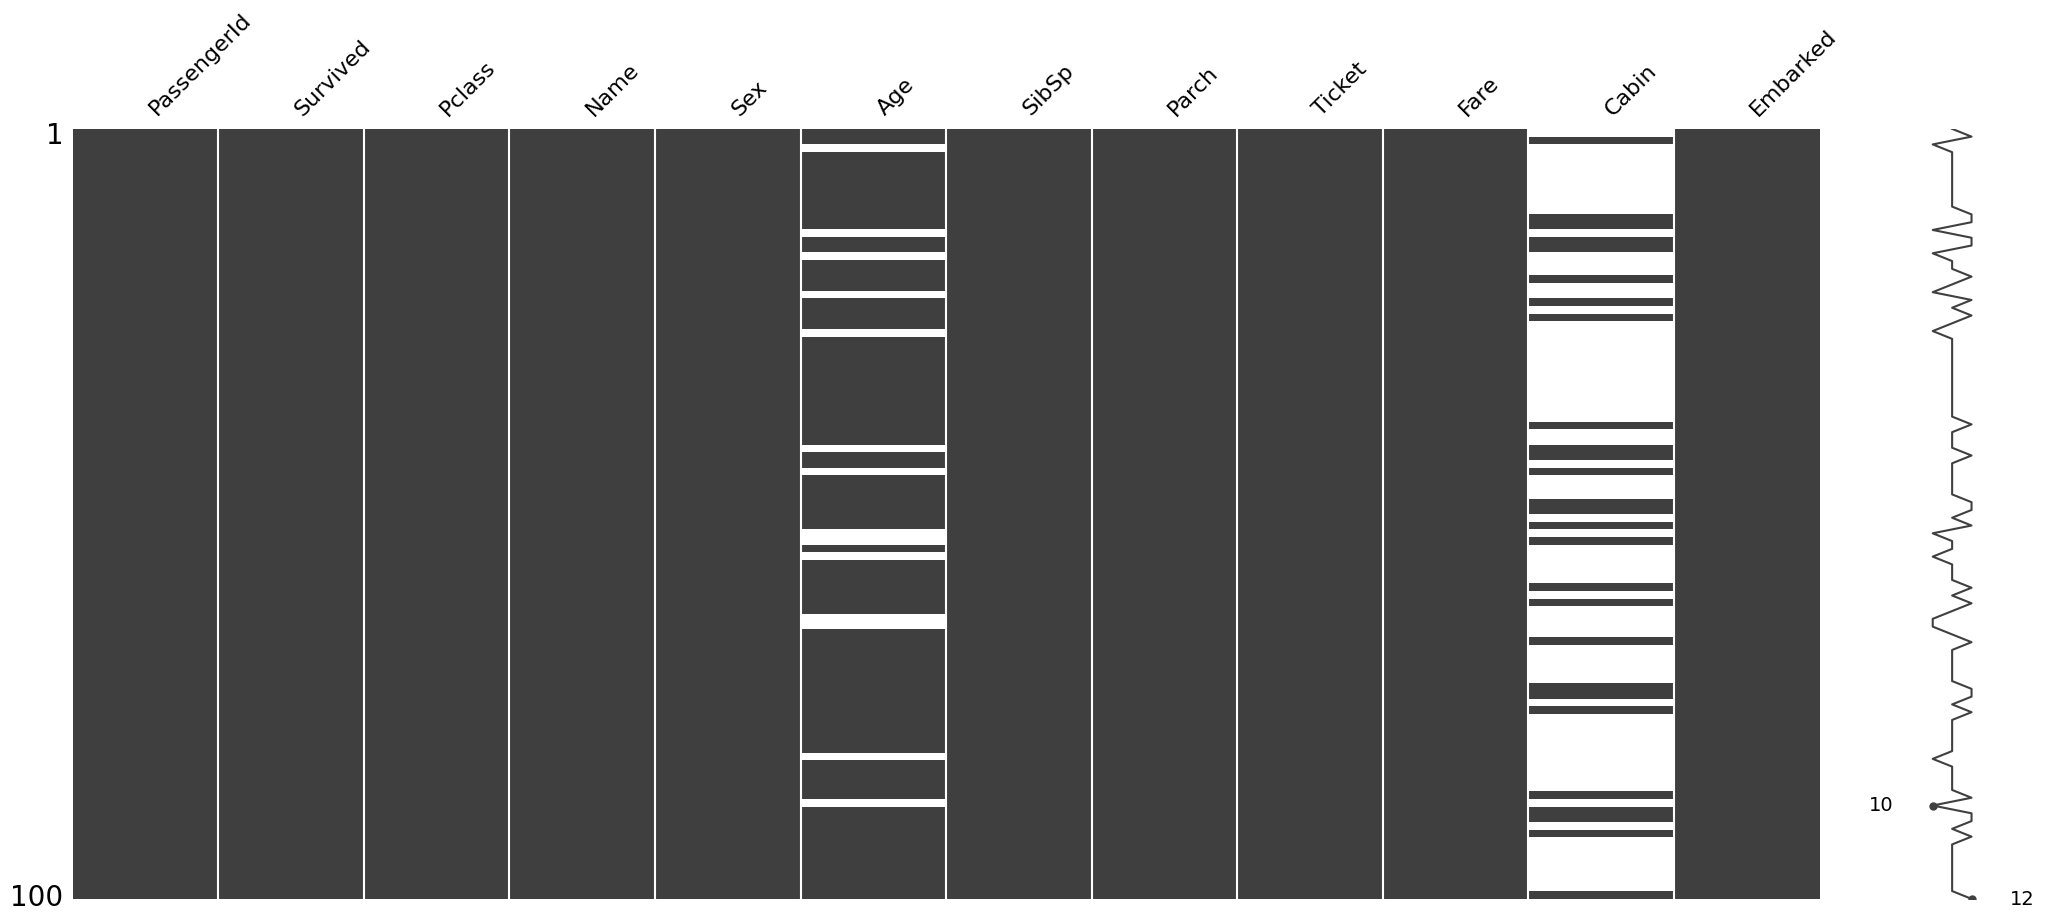

In [44]:
# 随机从train数据中取出100条数据，查看缺失值分布状况
msno.matrix(train.sample(100))

<AxesSubplot: >

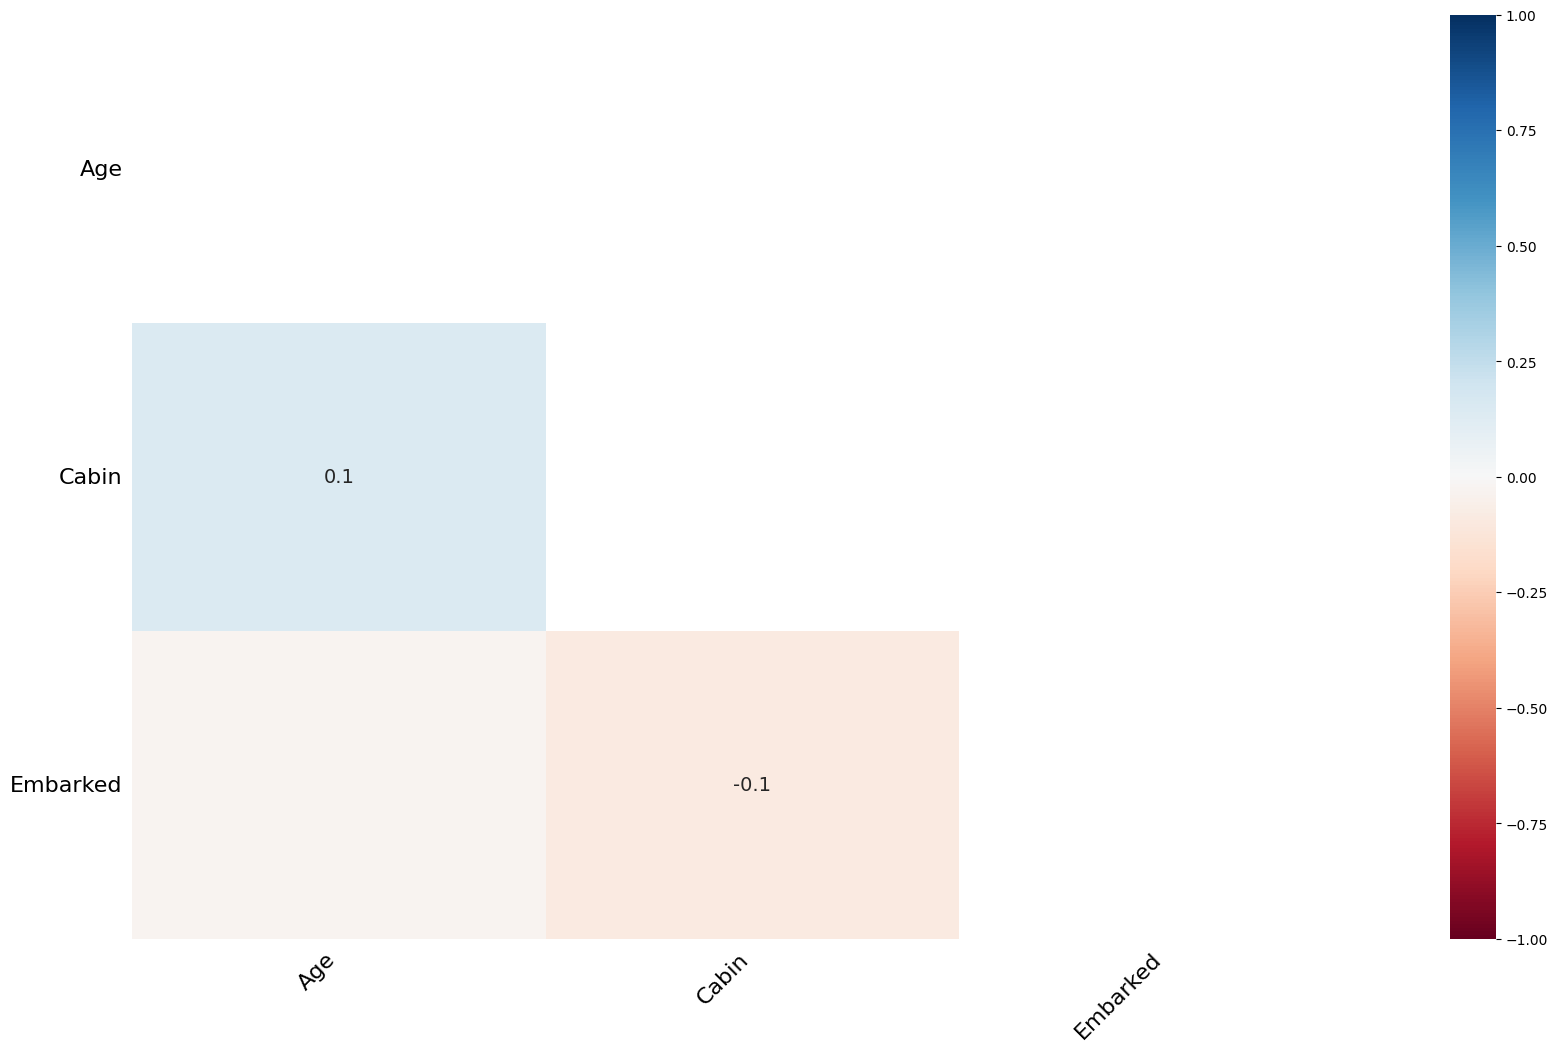

In [45]:
# 查看缺失值之间是否具有相关性
msno.heatmap(train)

<AxesSubplot: >

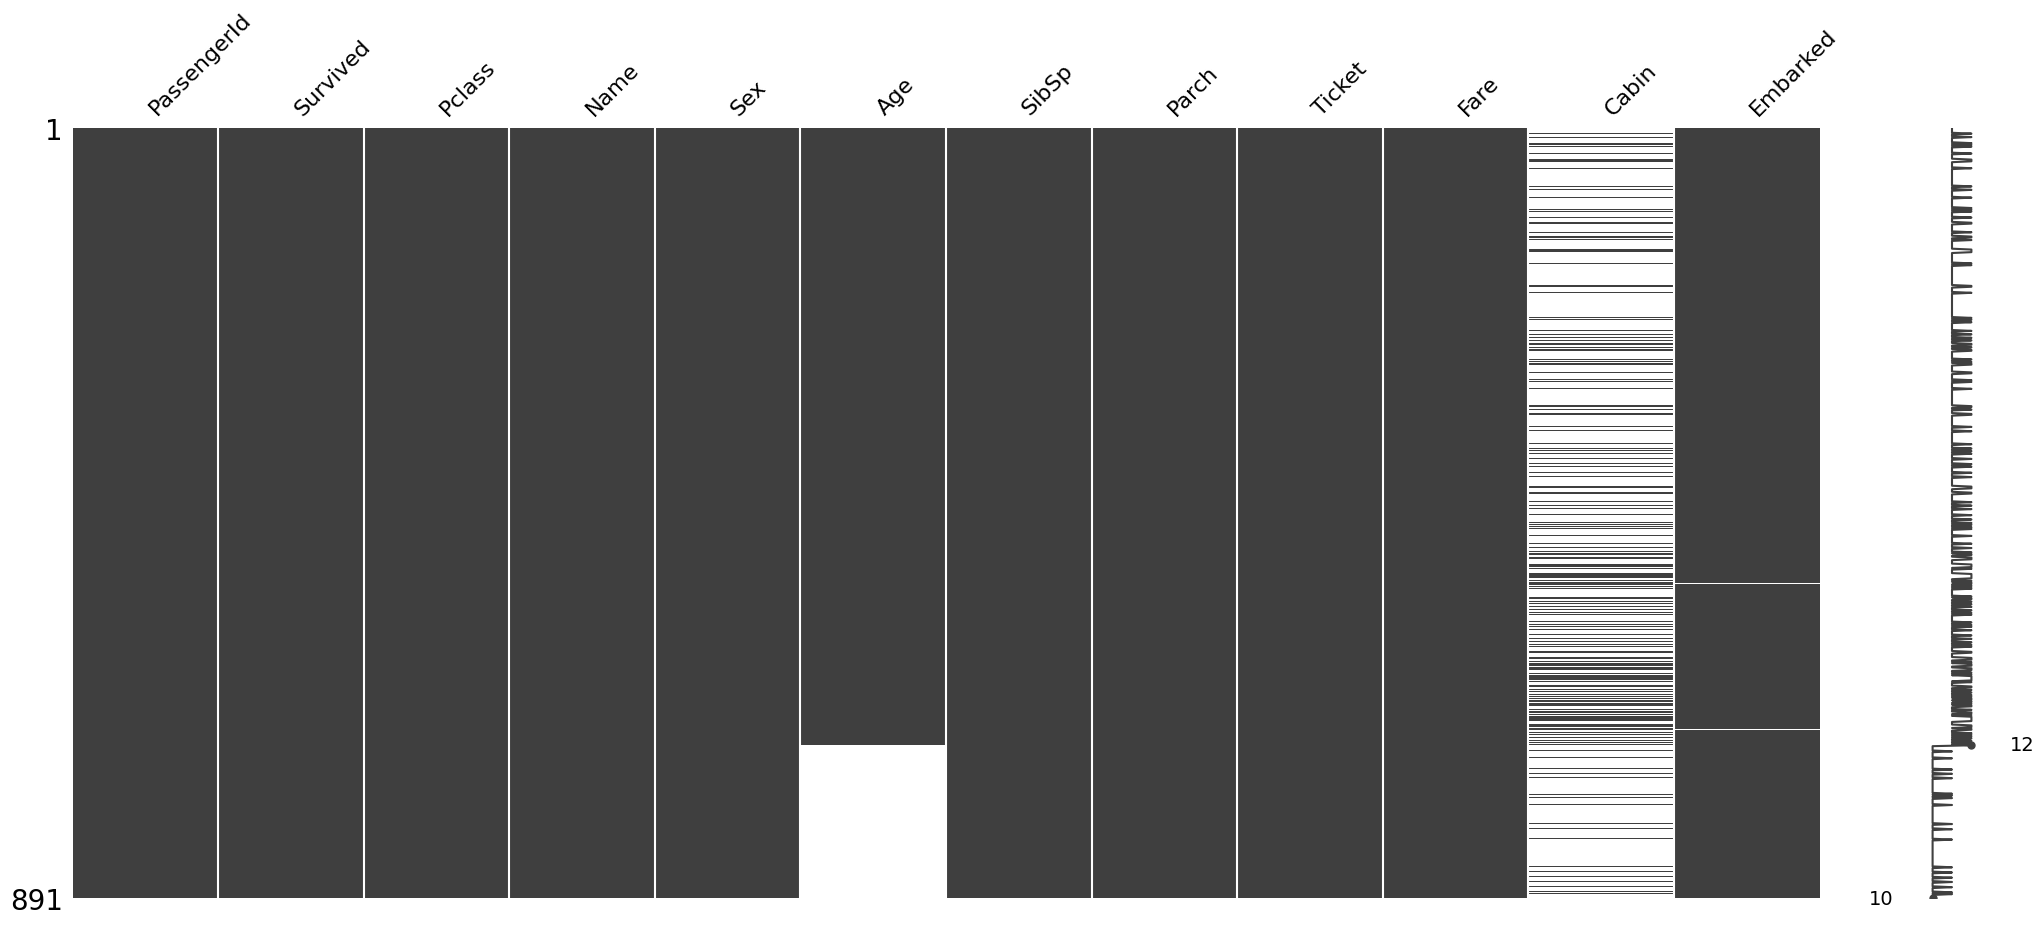

In [46]:
# 进一步按age进行排序，再图形化展示缺失值情况，以验证age的缺失与cabin确实无关
_sorted = train.sort_values('Age')
msno.matrix(_sorted)

## 缺失值处理

### 删除缺失值

0


<AxesSubplot: >

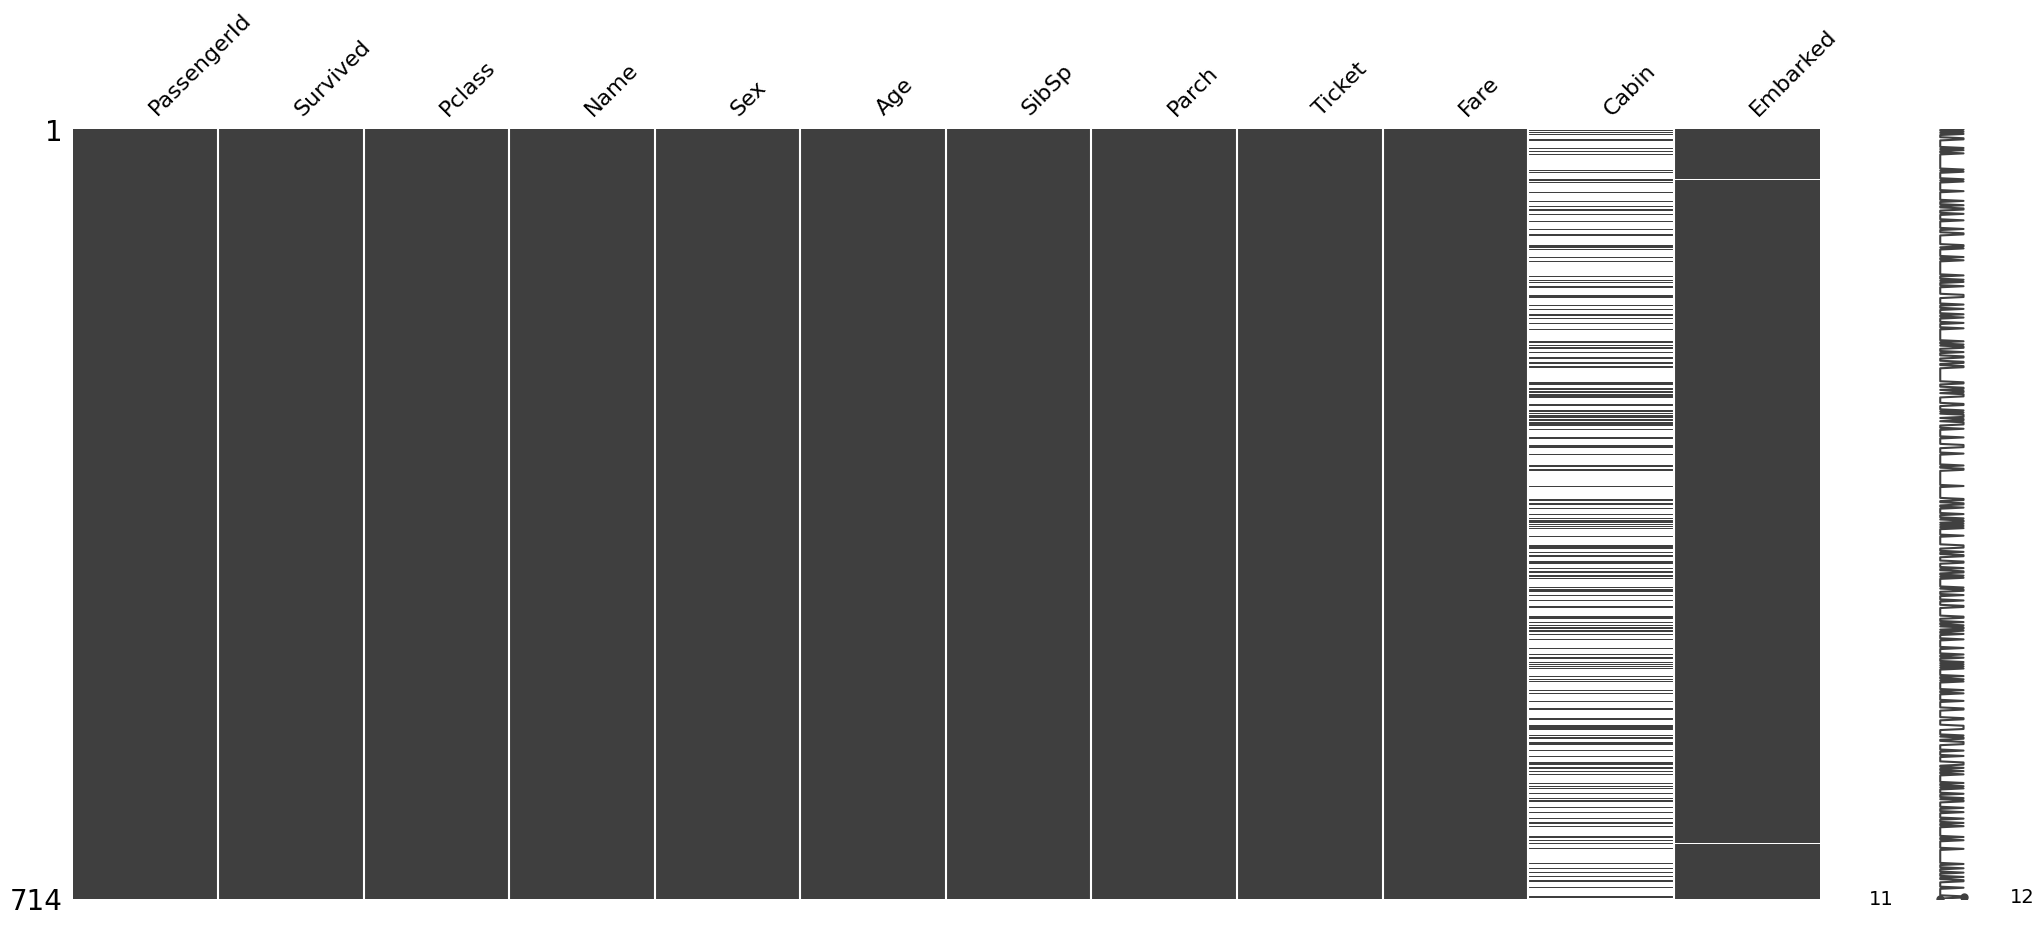

In [47]:
# 复制一份数据
train_cp = train.copy()
# 对Age列进行处理，空值就删除整行数据
train_cp.dropna(subset=['Age'],how='any',inplace=True)
# 输出Age列缺失的总数
print(train_cp['Age'].isnull().sum())
# 图形化概况
msno.matrix(train_cp)

<AxesSubplot: >

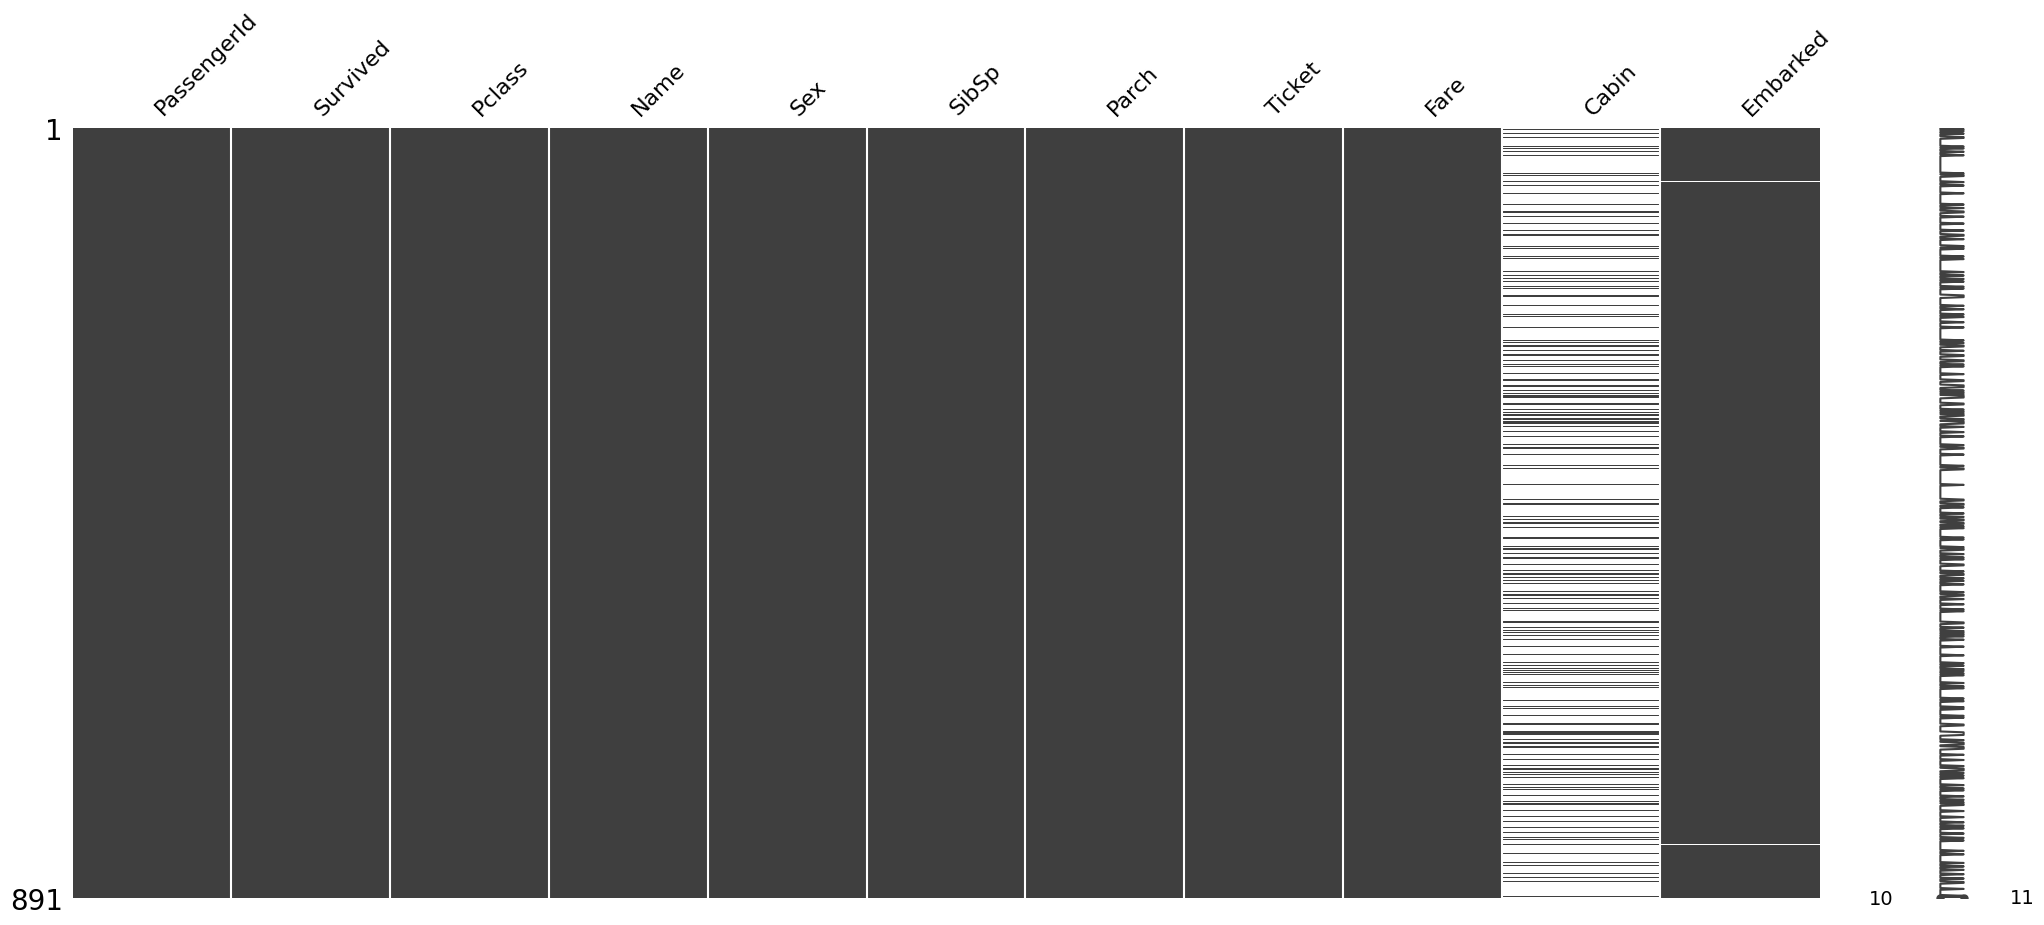

In [48]:
# 复制一份数据
train_cp = train.copy()
# 对Age列进行处理，空值就删除整行数据
train_cp.drop(['Age'],axis=1,inplace=True)
# 图形化缺失值情况
msno.matrix(train_cp)

### 填充缺失值

In [49]:
# 使用常量来替换
# 复制一份数据
train_constant = train.copy()
# 计算各列空值总数
print('填充缺失值之前')
print(train_constant.isnull().sum())
# 将所有空值均填为0，inplace = True 为必要参数
train_constant.fillna(0,inplace=True)
print('填充缺失值之后')
print(train_constant.isnull().sum())

填充缺失值之前
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
填充缺失值之后
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [50]:
# 复制一份数据
train_mean = train.copy()
# 计算年龄的平均值
age_mean = train_mean['Age'].mean()
print(age_mean)
# 使用年龄的平均值填充Age列的缺失值
train_mean['Age'].fillna(age_mean,inplace=True)
train_mean.isnull().sum()

29.69911764705882


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 时序数据缺失值处理

### 时序数据在某一列值的变化往往有一定线性规律，绝大多数的时序数据，具体的列值随着时间的变化而变化，所以对于有时序的行数据缺失值处理有三种方式：
- 用时间序列中空值的上一个非空值填充
- 用时间序列中空值的下一个非空值填充
- 线性插值方法

In [51]:
city_day = pd.read_csv('./data/city_day.csv',parse_dates=True,index_col='Date')
city_day_cp = city_day.copy()
city_day_cp

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [52]:
city_day_missing = missing_value_table(city_day_cp)
city_day_missing

传入的数据集共12列，
其中14列有缺失值


,缺失值,占比(%)
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [53]:
city_day['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [54]:
# 填充缺失值
city_day.fillna(method='ffill',inplace=True)
city_day['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [55]:
missing_value_table(city_day)

传入的数据集共12列，
其中5列有缺失值


,缺失值,占比(%)
NH3,2009,6.803021
PM10,1594,5.397718
AQI,28,0.094816
AQI_Bucket,28,0.094816
PM2.5,27,0.091429


In [56]:
# 使用fillna函数中的bfill参数，用时间序列中空值的下一个非空值填充
city_day['AQI'][20:30]

Date
2015-01-21      NaN
2015-01-22      NaN
2015-01-23      NaN
2015-01-24      NaN
2015-01-25      NaN
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [57]:
# 填充缺失值
city_day.fillna(method='bfill',inplace=True)
# 截取一小部分查看填充数据
city_day['AQI'][20:30]

Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [58]:
# 上面填充了缺失值之后，再次查看缺失值情况
# 查看缺失值比例
missing_value_table(city_day)

传入的数据集共12列，
其中0列有缺失值


,缺失值,占比(%)


###### 使用df.interpolate(limit_direction="both", inplace=True) 对缺失数据进行线性填充
- 绝大多数的时序数据，具体的列值随着时间的变化而变化。 因此，使用bfill和ffill进行插补并不是解决缺失值问题的最优方案。
- 线性插值法是一种插补缺失值技术，它假定数据点之间存在严格的线性关系，并利用相邻数据点中的非缺失值来计算缺失数据点的值

In [59]:
city_day_cp['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
Name: Xylene, dtype: float64

In [60]:
# 线性插值填充
city_day_cp.interpolate(limit_direction='both',inplace=True)
# 截取一小部分数据用于查看填充效果
city_day_cp['Xylene'][50:65]

Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
2015-03-06     2.2600
Name: Xylene, dtype: float64

## 其它填充缺失值的方法

- 上面介绍的线性填充缺失值的方法，其本质就是机器学习算法预测；当然还有其他机器学习算法可以用来做缺失值的计算，绝大多数场景只需要我们掌握上述缺失值填充的办法即可；一旦无法用上述办法来解决问题，那么将交由算法工程师来解决

# 总结

- 数据中包含缺失值是很常见的情况，缺失值可能在很多环节产生（用户没填，程序错误，数据合并...)
- pandas中用np.NaN 表示缺失值，通过pd.isnull()或者pd.notnull()来判断是否是缺失值
    - 常用的缺失值处理方式
    - 删除缺失值
    - 按行删除
    - 按列删除
    - 填充缺失值
    - 默认值填充
    - 统计值填充
    - 用前、后值填充
    - 线性插值填充